In [415]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
# Let's create three functions

## Self Implemented Linear Regression

In [416]:
def get_b(x, y):
    numerator = np.sum((x*y) - (y.mean()*x))
    denominator =  np.sum((x**2) - (x.mean()*x))
    return numerator / denominator

In [417]:
def get_a(x, y):
    return np.mean(y) - get_b(x,y)*np.mean(x)


In [418]:
def predict_value(x_pred, x_known, y_known):
    y_pred = get_a(x_known, y_known) + get_b(x_known, y_known) * x_pred
    
    return y_pred

In [419]:
def plot_line(slope, intercept, x_low,x_high):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.arange(x_low,x_high)
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

## Numpy Random Example

In [420]:
x = np.random.rand(10) * 10
y = np.random.rand(10) * 10
x.sort()
y.sort()

In [421]:
for i,k in zip(x,y):
    print(f'[{i}, {k}]')

[0.38442938673278304, 0.32541800582670644]
[0.6641731205949764, 0.8984638900197528]
[0.6662631176118272, 2.0421936013022157]
[0.8472501193373205, 3.1083615364057913]
[1.6679784857116742, 4.377503599393742]
[1.680137350327321, 5.249255623294598]
[3.3024757720488296, 5.411112515953917]
[7.5747735909179585, 5.89007263665162]
[8.208247100056907, 7.166286584554839]
[9.084964828881775, 9.714887213839642]


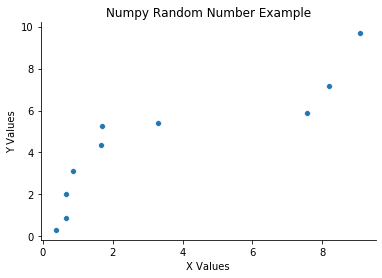

In [422]:
fig = sns.scatterplot(x,y)
fig.set_xlabel('X Values')
fig.set_ylabel('Y Values')
fig.set_title('Numpy Random Number Example')
sns.despine()
plt.savefig('numpy_scatter.png')

### Implemented Regression

In [423]:
b = get_b(x,y)
a = get_a(x,y)

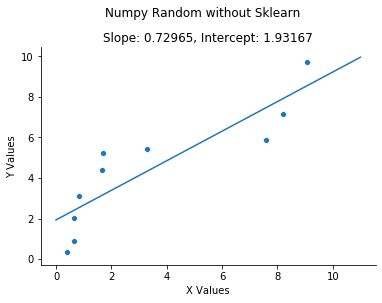

In [424]:
plot_line(b,a,0,12)
a,b = round(a,5),round(b,5)
fig = sns.scatterplot(x,y,data=df)
fig.set_xlabel('X Values')
fig.set_ylabel('Y Values')
fig.set_title(f'Slope: {b}, Intercept: {a}',y=1)
plt.suptitle('Numpy Random without Sklearn',y=1.02)
sns.despine()
plt.savefig('numpy_manual_reg.png')

### Sklearn Regression


In [425]:
model = LinearRegression()
model.fit(x.reshape(-1,1),y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [426]:
b_2 = model.coef_
a_2 = model.intercept_

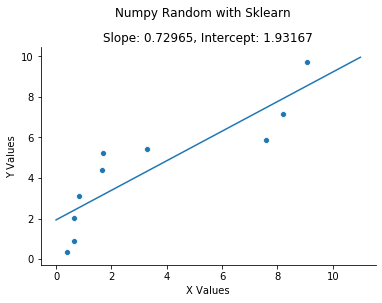

In [427]:
plot_line(b_2,a_2,0,12)
a_2,b_2 = round(a_2,5),round(b_2[0],5)
fig = sns.scatterplot(x,y,data=df)
fig.set_xlabel('X Values')
fig.set_ylabel('Y Values')
fig.set_title(f'Slope: {b_2}, Intercept: {a_2}',y=1)
plt.suptitle('Numpy Random with Sklearn',y=1.02)

sns.despine()

## UCI Data

In [428]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data',header=None,
                usecols=[21,25],na_values=['?'])
df.columns = ['horsepower','price']

In [429]:
df.head()

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0


In [430]:
df.dropna(inplace=True)
df.isna().sum()

horsepower    0
price         0
dtype: int64

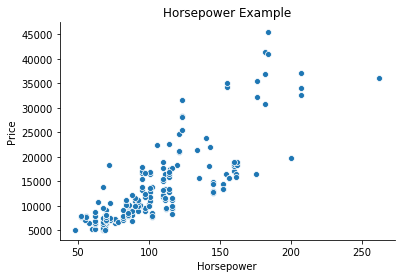

In [431]:
fig = sns.scatterplot('horsepower','price',data=df)
fig.set_xlabel('Horsepower')
fig.set_ylabel('Price')
fig.set_title('Horsepower Example')
sns.despine()

In [432]:
x = df['horsepower'].values
y = df['price'].values

### Implemented Regression

In [433]:
b_3 = round(get_b(x,y),5)
a_3 = round(get_a(x,y),5)

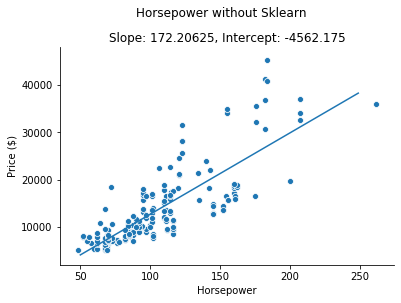

In [434]:
plot_line(b_3,a_3,50,250)
fig = sns.scatterplot('horsepower','price',data=df)
fig.set_xlabel('Horsepower')
fig.set_ylabel('Price ($)')
fig.set_title(f'Slope: {b_3}, Intercept: {a_3}',y=1)
plt.suptitle('Horsepower without Sklearn',y=1.02)
sns.despine()

### Sklearn Regression

In [435]:
model = LinearRegression()
model.fit(x.reshape(-1,1), y)

In [441]:
b_4 = round(model.coef_[0],5)
a_4 = round(model.intercept_,5)

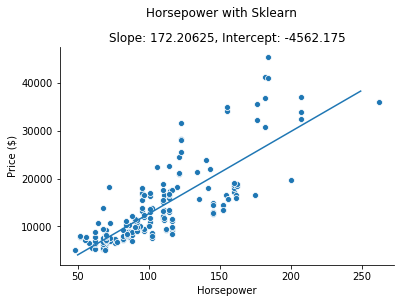

In [442]:
fig = sns.scatterplot('horsepower','price',data=df)
plot_line(b_4,a_4,50,250)
fig.set_xlabel('Horsepower')
fig.set_ylabel('Price ($)')
fig.set_title(f'Slope: {b_4}, Intercept: {a_4}',y=1)
plt.suptitle('Horsepower with Sklearn',y=1.02)
sns.despine()